In [1]:
import pandas as pd
import requests
import json
import numpy as np
from uszipcode import SearchEngine
import matplotlib.pyplot as plt


In [2]:
arrest_file = "LA Arrest Data 2018.csv"

In [3]:
crimedf = pd.read_csv(arrest_file, encoding='utf8')


In [4]:
# Remove arrest location without lat,lng
crimedf = crimedf[crimedf.Lat != 0]

In [5]:
#Using USZipCode to loop through crime data.
    #reversegeo lookup of incident cooridnates to find zip code and population
    #Already ran this once which is why this is quoted out
'''# Loop through rows using USzip to get new data
search = SearchEngine(simple_zipcode=True)
for index,row in crimedf.iterrows():
    query = search.by_coordinates(row['Lat'], row['Lng'], radius=30, returns=1)
    crimedf.loc[index,"Zip Code"] = query[0].zipcode
    crimedf.loc[index,"Population"] = query[0].population
    crimedf.loc[index,"City"] = query[0].major_city
    crimedf.loc[index,"County"] = query[0].county'''

'# Loop through rows using USzip to get new data\nsearch = SearchEngine(simple_zipcode=True)\nfor index,row in crimedf.iterrows():\n    query = search.by_coordinates(row[\'Lat\'], row[\'Lng\'], radius=30, returns=1)\n    crimedf.loc[index,"Zip Code"] = query[0].zipcode\n    crimedf.loc[index,"Population"] = query[0].population\n    crimedf.loc[index,"City"] = query[0].major_city\n    crimedf.loc[index,"County"] = query[0].county'

In [6]:
#ran this once 
#crimedf.to_csv('LA Arrest Data 2018_Clean.csv')

In [7]:
New_arrest_file = ('LA Arrest Data 2018_Clean.csv')

In [8]:
crimedf_clean = pd.read_csv(New_arrest_file, encoding='utf8')

In [9]:
#Create new table of zip,city, zip Population for later merge
City_info_Summary_df = crimedf_clean[['Zip Code','City','Population','County']].drop_duplicates()

In [10]:
crimedf_clean.head()

,Unnamed: 0,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,...,Charge Description,Address,Cross Street,Location,Lat,Lng,Zip Code,Population,City,County
0,0,5192940,1/1/2018,1625.0,11,Northeast,1123,27,M,H,...,TRANSPORT/SELL/ETC CONTROLLED SUBSTANCE,3900 BRUNSWICK AV,NaN,"(34.123, -118.264)",34.1230,-118.2640,90039,28514.0,Los Angeles,Los Angeles County
1,1,5192650,1/1/2018,1400.0,18,Southeast,1822,25,M,H,...,BURGLARY FROM VEHICLE,CENTURY BL,BROADWAY,"(33.9456, -118.2781)",33.9456,-118.2781,90044,89779.0,Los Angeles,Los Angeles County
2,2,5192692,1/1/2018,845.0,7,Wilshire,702,37,M,H,...,DUI ALCOHOL/DRUGS W/INJURY,MELROSE,GARDNER,"(34.0837, -118.3532)",34.0837,-118.3532,90036,36865.0,Los Angeles,Los Angeles County
3,3,5192949,1/1/2018,1810.0,3,Southwest,332,57,M,B,...,BURGLARY,3000 POTOMAC AV,NaN,"(34.0276, -118.3439)",34.0276,-118.3439,90016,47596.0,Los Angeles,Los Angeles County
4,4,5192436,1/1/2018,120.0,13,Newton,1362,27,M,H,...,VIOLATION OF PAROLE:FELONY,5100 AVALON BL,NaN,"(33.9981, -118.2697)",33.9981,-118.2697,90011,103892.0,Los Angeles,Los Angeles County


In [11]:
City_info_Summary_df.to_csv('Zip Info Summary.csv')
City_info_Summary_df.head()

,Zip Code,City,Population,County
0,90039,Los Angeles,28514.0,Los Angeles County
1,90044,Los Angeles,89779.0,Los Angeles County
2,90036,Los Angeles,36865.0,Los Angeles County
3,90016,Los Angeles,47596.0,Los Angeles County
4,90011,Los Angeles,103892.0,Los Angeles County


In [12]:
#Create Incident summary dataframe
Incidents_by_Zip = crimedf_clean.groupby('Zip Code').count()['Sex Code']
Incidents_by_Zip_clean = pd.DataFrame({'Zip Code':Incidents_by_Zip.index, '# of Incidents':Incidents_by_Zip.values})
Incidents_by_Zip_clean.head()


,Zip Code,# of Incidents
0,90001,395
1,90002,837
2,90003,2953
3,90004,1173
4,90005,940


In [13]:
#Create Dispensary Count summary dataframe
Dispendarydf = pd.read_csv('marijuana_dispensaries_w_coords.csv', encoding='utf8')
Dispendarydf_clean = Dispendarydf[Dispendarydf.County =='LOS ANGELES'] #filter DF for only those in LA County
Dispendarydf_clean.head()


,Unnamed: 0,License Number,License Type,Business Owner,Business Contact Information,Business Structure,Premise Address,CA,Zip Code,County_with leading space,County,Status,Issue Date,Expiration Date,Activities,Adult-Use/Medicinal,Latitude,Longitude
3,3,C10-18-0000288-TEMP,Cannabis - Retailer Temporary License,Basil Bailey,ORIGINAL BALBOA CAREGIVERS : Email- balboacare...,Corporation,9419 MASON AVE CHATSWORTH,CA,91311,LOS ANGELES,LOS ANGELES,Active,12/31/2018,7/29/2019,N/A for this license type,BOTH,34.241268,-118.580710
6,6,C10-18-0000291-TEMP,Cannabis - Retailer Temporary License,Maria Colvin,"Hollywood Holistic Healers, Inc. : Email- holl...",Corporation,8210 W SUNSET BLVD LOS ANGELES,CA,90046,LOS ANGELES,LOS ANGELES,Active,12/31/2018,7/29/2019,N/A for this license type,BOTH,34.097766,-118.367984
7,7,C10-18-0000292-TEMP,Cannabis - Retailer Temporary License,David Barakett,"THE AIRPORT COLLECTIVE, INC. : Email- longbeac...",Corporation,3411 ANAHEIM ST LONG BEACH,CA,90804,LOS ANGELES,LOS ANGELES,Active,12/31/2018,7/29/2019,N/A for this license type,BOTH,33.783170,-118.152108
13,13,C10-18-0000278-TEMP,Cannabis - Retailer Temporary License,Shaun Lang,"Strain Balboa Caregivers, Inc. : Email- nuashx...",Corporation,21627 DEVONSHIRE ST CHATSWORTH,CA,91311,LOS ANGELES,LOS ANGELES,Active,12/29/2018,7/27/2019,N/A for this license type,BOTH,34.257461,-118.601340
14,14,C10-18-0000279-TEMP,Cannabis - Retailer Temporary License,Robert Rosenheck,"REDWOOD RETAIL, LLC : Lord Jones : Email- mon...",Limited Liability Company,8300 SUNSET BLVD LOS ANGELES,CA,90069,LOS ANGELES,LOS ANGELES,Active,12/29/2018,7/27/2019,N/A for this license type,Adult-Use,34.095945,-118.370894


In [14]:
# Counts # of dispensaries by Zip Code
Dispendary_by_Zip = Dispendarydf_clean.groupby('Zip Code').count()['CA']
Dispendary_by_Zip_Clean = pd.DataFrame({'Zip Code':Dispendary_by_Zip.index, '# of Dispensaries':Dispendary_by_Zip.values})
Dispendary_by_Zip_Clean.to_csv('LA County # of Dispensaries by Zip.csv')

In [15]:
City_Crime_Final = pd.merge(Incidents_by_Zip_clean,City_info_Summary_df, on='Zip Code',how='left')
City_Crime_Final = pd.merge(City_Crime_Final,Dispendary_by_Zip_Clean, on='Zip Code',how='left').fillna('0')
City_Crime_Final = City_Crime_Final[City_Crime_Final.Population != 0]
City_Crime_Final['Incidents per capita']= (City_Crime_Final['# of Incidents']/City_Crime_Final['Population'])*1000
City_Crime_Final['# of Dispensaries'] = City_Crime_Final['# of Dispensaries'].astype(int)

In [16]:
City_Crime_Final.to_csv('City_Crime_Final.csv',index=False)

In [17]:
City_Crime_Final.head()

,Zip Code,# of Incidents,City,Population,County,# of Dispensaries,Incidents per capita
0,90001,395,Los Angeles,57110.0,Los Angeles County,3,6.916477
1,90002,837,Los Angeles,51223.0,Los Angeles County,0,16.340316
2,90003,2953,Los Angeles,66266.0,Los Angeles County,0,44.562823
3,90004,1173,Los Angeles,62180.0,Los Angeles County,0,18.864587
4,90005,940,Los Angeles,37681.0,Los Angeles County,0,24.946259


In [18]:
Incident_Dispensary_Final = City_Crime_Final.groupby(['# of Dispensaries'])[["Incidents per capita"]].mean()
Incident_Dispensary_Final = Incident_Dispensary_Final.reset_index()
Incident_Dispensary_Final['# of Dispensaries']=Incident_Dispensary_Final['# of Dispensaries'].astype(int)
Incident_Dispensary_Final.head()

,# of Dispensaries,Incidents per capita
0,0,586.043894
1,1,53.774029
2,2,16.069112
3,3,25.238207
4,4,12.693621


Text(220, 1, 'Rate of Incident = Zip Pop./# of Incidents')

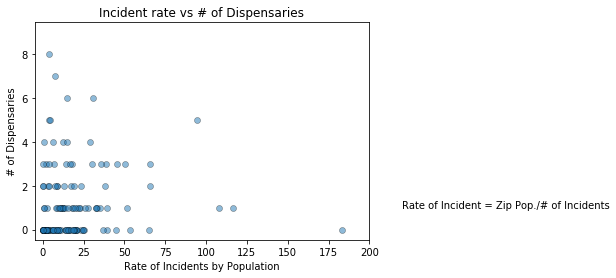

In [19]:
plt.scatter(City_Crime_Final['Incidents per capita'],City_Crime_Final['# of Dispensaries'],alpha =.5, linewidth= .5,edgecolors = 'black')
plt.xlim(-5,200)
plt.title('Incident rate vs # of Dispensaries')
plt.ylabel('# of Dispensaries')
plt.xlabel('Rate of Incidents by Population')
plt.text(220,1,"Rate of Incident = Zip Pop./# of Incidents")

In [20]:
crimedf_clean_2 = pd.merge(crimedf_clean, Dispendary_by_Zip_Clean, on='Zip Code',how='left').fillna('0')

Text(0.5, 0, 'Arrest Date')

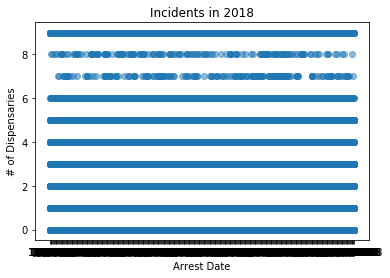

In [21]:
plt.scatter(crimedf_clean_2['Arrest Date'],crimedf_clean_2['# of Dispensaries'],alpha =.5)
plt.title('Incidents in 2018')
plt.ylabel('# of Dispensaries')
plt.xlabel('Arrest Date')


In [22]:
crimedf_clean_2

,Unnamed: 0,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,...,Address,Cross Street,Location,Lat,Lng,Zip Code,Population,City,County,# of Dispensaries
0,0,5192940,1/1/2018,1625,11,Northeast,1123,27,M,H,...,3900 BRUNSWICK AV,0,"(34.123, -118.264)",34.1230,-118.2640,90039,28514.0,Los Angeles,Los Angeles County,2
1,1,5192650,1/1/2018,1400,18,Southeast,1822,25,M,H,...,CENTURY BL,BROADWAY,"(33.9456, -118.2781)",33.9456,-118.2781,90044,89779.0,Los Angeles,Los Angeles County,0
2,2,5192692,1/1/2018,845,7,Wilshire,702,37,M,H,...,MELROSE,GARDNER,"(34.0837, -118.3532)",34.0837,-118.3532,90036,36865.0,Los Angeles,Los Angeles County,2
3,3,5192949,1/1/2018,1810,3,Southwest,332,57,M,B,...,3000 POTOMAC AV,0,"(34.0276, -118.3439)",34.0276,-118.3439,90016,47596.0,Los Angeles,Los Angeles County,3
4,4,5192436,1/1/2018,120,13,Newton,1362,27,M,H,...,5100 AVALON BL,0,"(33.9981, -118.2697)",33.9981,-118.2697,90011,103892.0,Los Angeles,Los Angeles County,0
5,5,181104086,1/1/2018,1530,11,Northeast,1102,41,M,O,...,2900 LOS FELIZ BL,0,"(34.1367, -118.2713)",34.1367,-118.2713,91204,16032.0,Glendale,Los Angeles County,0
6,6,5192608,1/1/2018,1040,12,77th Street,1265,36,M,B,...,8200 DENKER AV,0,"(33.9646, -118.3046)",33.9646,-118.3046,90047,48606.0,Los Angeles,Los Angeles County,2
7,7,5193035,1/1/2018,1950,16,Foothill,1676,36,M,H,...,PENROSE,GLENOAKS,"(34.2268, -118.3631)",34.2268,-118.3631,91352,47807.0,Sun Valley,Los Angeles County,5
8,8,5192694,1/1/2018,1200,1,Central,182,28,M,H,...,1200 S OLIVE ST,0,"(34.0395, -118.2622)",34.0395,-118.2622,90015,18986.0,Los Angeles,Los Angeles County,2
9,9,5193007,1/1/2018,1900,12,77th Street,1258,37,F,B,...,100 W 78TH ST,0,"(33.9689, -118.2739)",33.9689,-118.2739,90003,66266.0,Los Angeles,Los Angeles County,0
